In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
redshifts = np.array([0,1,2,3])
data = np.loadtxt('HMF.txt')
log10M = data[:,0]
R = data[:,1:]  # shape M x z

In [3]:
R

array([[1.00023006, 1.07975333, 1.15100971, 1.17128951],
       [1.01465531, 1.09942011, 1.18461494, 1.1820997 ],
       [1.02193808, 1.09130259, 1.0971378 , 1.1449787 ],
       [1.03018568, 1.02708671, 1.06465878, 0.74970934],
       [1.04259277, 1.10652484, 0.73910431, 0.33422183],
       [1.07924852, 0.94716014,        inf,        inf],
       [1.23490252, 0.3540488 ,        inf,        nan]])

In [4]:
cut = min(np.where(np.isnan(R) + np.isinf(R))[0]) - 2 # at first I included all mass bins that have no infs or nans, but for z=3, the high mass bins are noisy, so lets cut at log10M=13

In [5]:
log10M[cut-1]

12.882173326852097

In [6]:
x = redshifts
y = log10M[:cut]
b = R[:cut]

In [7]:
X, Y = np.meshgrid(x, y, copy=False)
X = X.flatten()
Y = Y.flatten()

A = np.array([X*0+1, X, Y, X**2, Y**2, X*Y]).T
B = b.flatten()

In [113]:
coeff, r, rank, s = np.linalg.lstsq(A, B)
pred = (A @ coeff).reshape(b.shape)

/global/common/software/m3058/abayer/conda/nbodykit/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [114]:
coeff, r, rank, s

(array([-1.48488443e+01,  3.52954657e-01,  2.54491472e+00, -1.40039268e-02,
        -1.01970161e-01, -2.09477671e-02]),
 array([0.00196851]),
 6,
 array([5.38627429e+02, 4.92045623e+01, 3.40058693e+00, 1.42520596e+00,
        1.25615920e-01, 2.62945788e-03]))

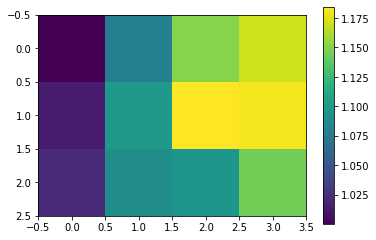

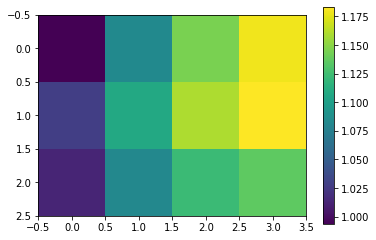

In [115]:
plt.figure()
plt.imshow(b)
plt.colorbar()

plt.figure()
plt.imshow(pred)
plt.colorbar()

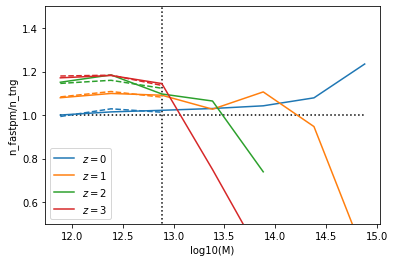

In [116]:
for zi,z in enumerate(redshifts):
    plt.plot(log10M, R[:,zi], label=r'$z=%d$'%z, color='C%d'%zi)
    plt.plot(log10M[:cut], pred[:,zi], color='C%d'%zi, linestyle='--')
plt.hlines(1,min(log10M),max(log10M),color='k',linestyle=':')
plt.vlines(log10M[cut-1],0.1,1.5,color='k',linestyle=':')
plt.ylim(0.5, 1.5)
plt.xlabel('log10(M)')
plt.ylabel('n_fastpm/n_tng')
plt.legend()

### so method can be to apply above quadratic fit for log10M < 12.9. but what to do at high M? Should make correction continuous func of M for all M